In [1]:
print("Num GPUs Available: ", len(tf.config.list_physical_devices('GPU')))

Num GPUs Available:  1


In [1]:
# Import libraries for data loading
import os
import random

# Import libraries for data operations
import numpy as np

In [3]:
# Check if TensorFlow is using GPU
print("Is TensorFlow using GPU:", tf.test.is_built_with_cuda())

# List available GPUs
print("Available GPUs:", tf.config.list_physical_devices('GPU'))

# Set TensorFlow to use GPU memory growth
gpus = tf.config.experimental.list_physical_devices('GPU')
if gpus:
    try:
        for gpu in gpus:
            tf.config.experimental.set_memory_growth(gpu, True)
    except RuntimeError as e:
        print(e)

Is TensorFlow using GPU: True
Available GPUs: [PhysicalDevice(name='/physical_device:GPU:0', device_type='GPU')]


In [2]:
# Define the path to the dataset
dataset_path = r"D:\Pattern_Recognition\realwaste\realwaste-main\RealWaste"

# Define classes
classes = ["Cardboard", "Food Organics", "Glass", "Metal", "Miscellaneous Trash", "Paper", "Plastic", "Textile Trash", "Vegetation"]

In [3]:
# Define the paths for each class
class_paths = {cls: os.path.join(dataset_path, cls) for cls in classes}

# Function to list files in a directory
def list_files(directory_path):
    return os.listdir(directory_path)

# List files in each directory
print("Paths to dataset folder:")
print("Dataset Path:", dataset_path)
print("\nFiles in each folder:")
for cls, path in class_paths.items():
    files = list_files(path)
    print(f"\n{cls}:")
    for file in files[:5]:  # Display only the first 5 files
        print(f"  - {file}")
    if len(files) > 5:
        print(f"  ... and {len(files) - 5} more files")

Paths to dataset folder:
Dataset Path: D:\Pattern_Recognition\realwaste\realwaste-main\RealWaste

Files in each folder:

Cardboard:
  - Cardboard_1.jpg
  - Cardboard_10.jpg
  - Cardboard_100.jpg
  - Cardboard_101.jpg
  - Cardboard_102.jpg
  ... and 456 more files

Food Organics:
  - Food Organics_1.jpg
  - Food Organics_10.jpg
  - Food Organics_100.jpg
  - Food Organics_101.jpg
  - Food Organics_102.jpg
  ... and 406 more files

Glass:
  - Glass_1.jpg
  - Glass_10.jpg
  - Glass_100.jpg
  - Glass_101.jpg
  - Glass_102.jpg
  ... and 415 more files

Metal:
  - Metal_1.jpg
  - Metal_10.jpg
  - Metal_100.jpg
  - Metal_101.jpg
  - Metal_102.jpg
  ... and 785 more files

Miscellaneous Trash:
  - Miscellaneous Trash_1.jpg
  - Miscellaneous Trash_10.jpg
  - Miscellaneous Trash_100.jpg
  - Miscellaneous Trash_101.jpg
  - Miscellaneous Trash_102.jpg
  ... and 490 more files

Paper:
  - Paper_1.jpg
  - Paper_10.jpg
  - Paper_100.jpg
  - Paper_101.jpg
  - Paper_102.jpg
  ... and 495 more files

Pla

In [4]:
import pandas as pd
# Function to count files in a folder
def count_files(folder_path):
    file_list = os.listdir(folder_path)
    return len(file_list)

# Create a dictionary with class names and counts
classes_dict = {cls: count_files(class_paths[cls]) for cls in classes}

# Create a DataFrame from the dictionary
classes_df = pd.DataFrame.from_dict(classes_dict, orient='index', columns=['Number of Images'])

# Sort the DataFrame by 'Number of Images' in descending order
classes_df_sorted = classes_df.sort_values('Number of Images', ascending=False)

# Display the sorted DataFrame
classes_df_sorted

,Number of Images
Plastic,921
Metal,790
Paper,500
Miscellaneous Trash,495
Cardboard,461
Vegetation,436
Glass,420
Food Organics,411
Textile Trash,318


In [5]:
# Define path list
path_list = [class_paths[cls] for cls in classes]

# Create empty list of image path and class
image_path = []
class_labels = []

# Iterate through all of the images in the path list to extract path and class
for i, dir_path in enumerate(path_list):
    image_names = os.listdir(dir_path)
    for name_file in image_names:
        full_image_path = os.path.join(dir_path, name_file)
        image_path.append(full_image_path)
        class_labels.append(classes[i])

# Create a dataframe
df = pd.DataFrame({
    "Image_Path": image_path,
    "Class": class_labels
})

# Show the first 5 rows
df.head()

,Image_Path,Class
0,D:\Pattern_Recognition\realwaste\realwaste-mai...,Cardboard
1,D:\Pattern_Recognition\realwaste\realwaste-mai...,Cardboard
2,D:\Pattern_Recognition\realwaste\realwaste-mai...,Cardboard
3,D:\Pattern_Recognition\realwaste\realwaste-mai...,Cardboard
4,D:\Pattern_Recognition\realwaste\realwaste-mai...,Cardboard


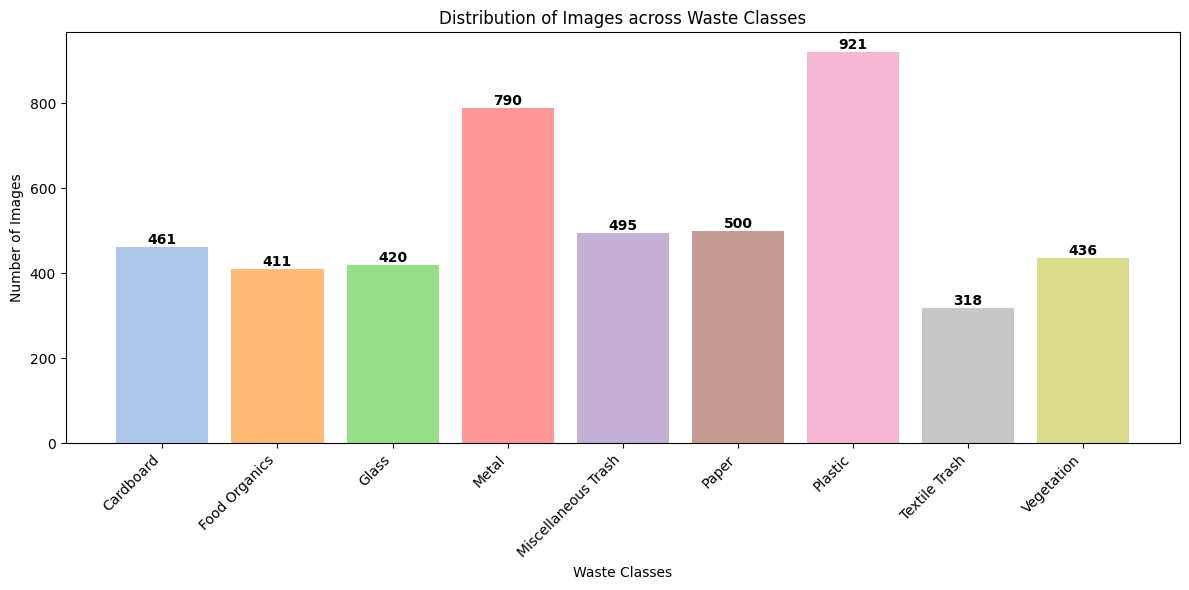

In [6]:
import matplotlib.pyplot as plt
# Counts occurrences of each class
class_counts = df['Class'].value_counts().sort_index()

# Define list of colors for 9 classes (lighter palette)
colors = ['#aec7e8', '#ffbb78', '#98df8a', '#ff9896', '#c5b0d5', 
          '#c49c94', '#f7b6d2', '#c7c7c7', '#dbdb8d']

# Plot the graph
plt.figure(figsize=(12, 6))
bars = plt.bar(class_counts.index, class_counts.values, color=colors)
plt.xlabel('Waste Classes')
plt.ylabel('Number of Images')
plt.title('Distribution of Images across Waste Classes')

# Add the number of counts on top of each bar
for bar in bars:
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2, yval, int(yval), 
             ha='center', va='bottom', fontweight='bold')

# Rotate x-axis labels for better readability
plt.xticks(rotation=45, ha='right')

# Adjust layout to prevent cutting off labels
plt.tight_layout()

plt.show()

In [7]:
from sklearn.model_selection import train_test_split

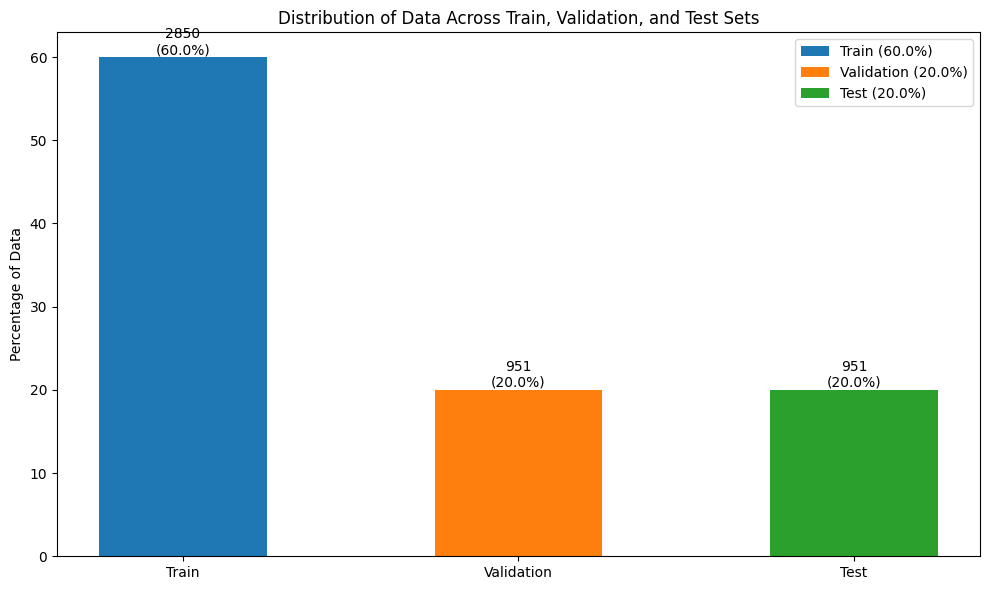

In [17]:
from sklearn.model_selection import train_test_split
# Define ratio
train_ratio = 0.60
val_ratio = 0.20
test_ratio = 0.20

# Split train and test first
df_train_val, df_test = train_test_split(df, test_size=test_ratio, stratify=df['Class'], random_state=42)

# Then split train_val into train and validation
df_train, df_val = train_test_split(df_train_val, test_size=val_ratio/(train_ratio+val_ratio), stratify=df_train_val['Class'], random_state=42)

# Prepare data for visualization
datasets = [df_train, df_val, df_test]
names = ['Train', 'Validation', 'Test']
colors = ['#1f77b4', '#ff7f0e', '#2ca02c']  # Blue, Orange, Green

# Create the bar chart
fig, ax = plt.subplots(figsize=(10, 6))

x = np.arange(len(names))
total = len(df)
widths = [len(d) / total for d in datasets]

for i, (dataset, name, color) in enumerate(zip(datasets, names, colors)):
    count = len(dataset)
    percentage = count / total * 100
    ax.bar(i, percentage, width=0.5, color=color, label=f'{name} ({percentage:.1f}%)')
    ax.text(i, percentage, f'{count}\n({percentage:.1f}%)', ha='center', va='bottom')

ax.set_ylabel('Percentage of Data')
ax.set_title('Distribution of Data Across Train, Validation, and Test Sets')
ax.set_xticks(x)
ax.set_xticklabels(names)
ax.legend()

plt.tight_layout()
plt.show()

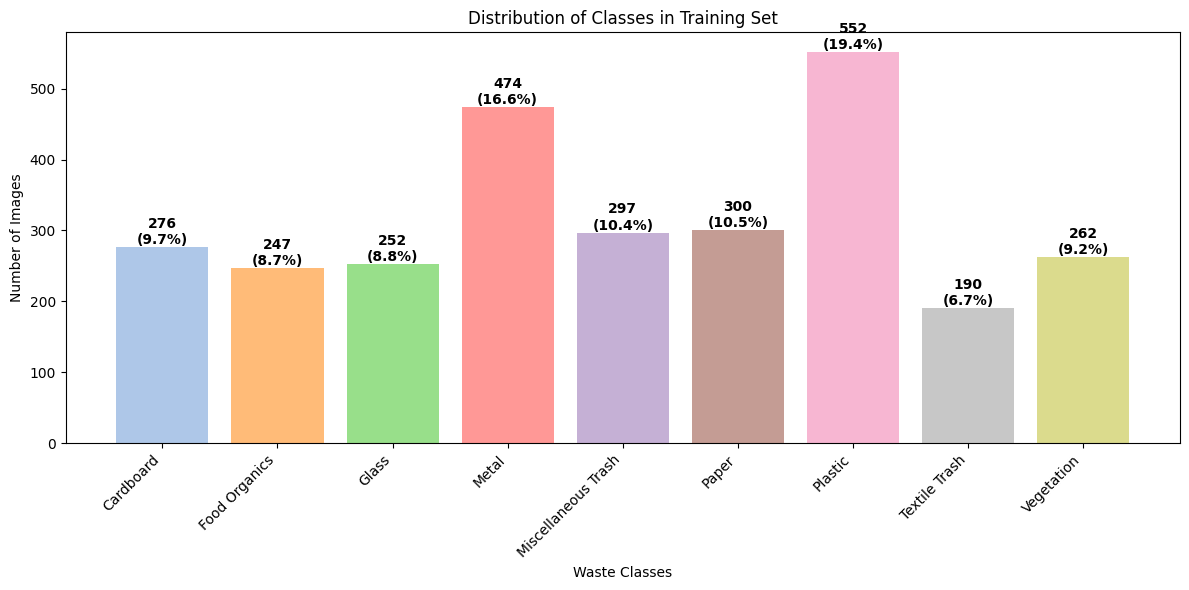

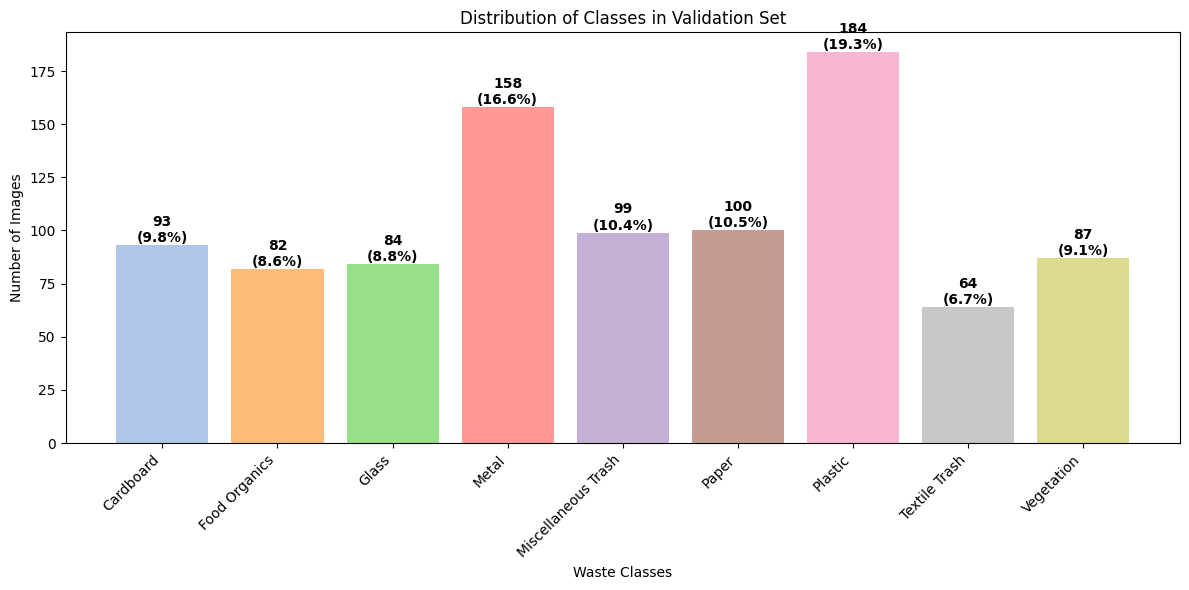

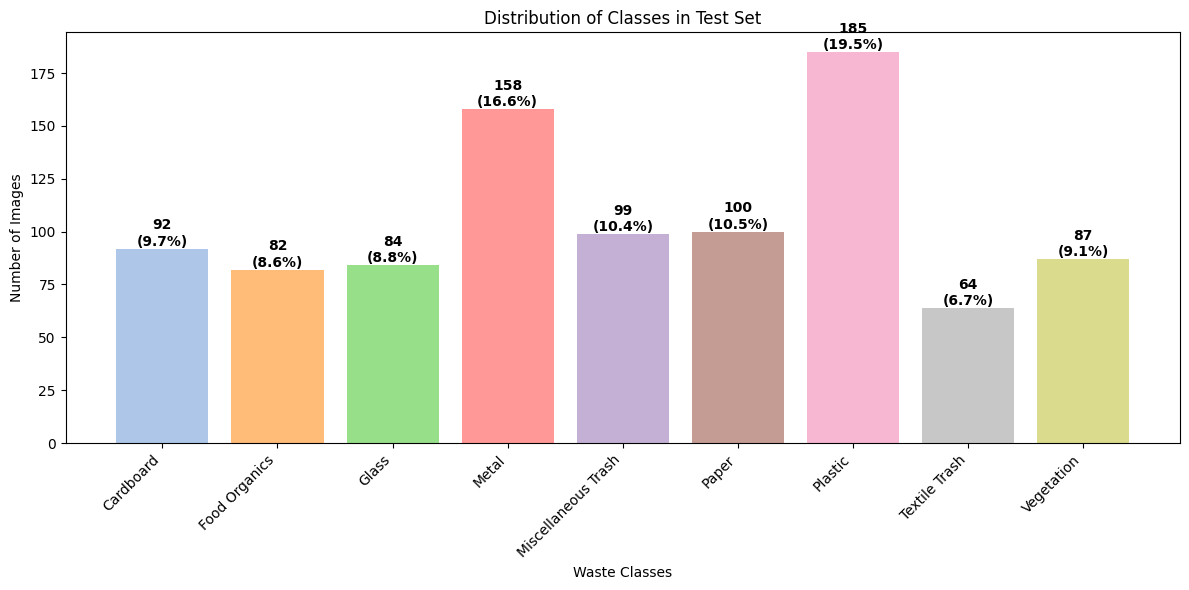

In [18]:
# Define colors
colors = ['#aec7e8', '#ffbb78', '#98df8a', '#ff9896', '#c5b0d5', 
          '#c49c94', '#f7b6d2', '#c7c7c7', '#dbdb8d']

# Plot class disrbution for each df train, val, test
def plot_class_distribution(dataset, title):
    class_counts = dataset['Class'].value_counts().sort_index()
    
    fig, ax = plt.subplots(figsize=(12, 6))
    bars = ax.bar(class_counts.index, class_counts.values, color=colors)
    
    ax.set_xlabel('Waste Classes')
    ax.set_ylabel('Number of Images')
    ax.set_title(f'Distribution of Classes in {title} Set')
    
    # Add value labels on top of each bar
    for bar in bars:
        height = bar.get_height()
        ax.text(bar.get_x() + bar.get_width()/2, height,
                f'{height}\n({height/len(dataset):.1%})',
                ha='center', va='bottom', fontweight='bold')
    
    plt.xticks(rotation=45, ha='right')
    plt.tight_layout()
    plt.show()

# Plot distribution for each dataset
plot_class_distribution(df_train, 'Training')
plot_class_distribution(df_val, 'Validation')
plot_class_distribution(df_test, 'Test')


In [19]:
# Define image size and batch size
width = 512
height = 512
image_size = (width, height)

In [20]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator, load_img, img_to_array

# Import libraries for model creation
from keras.models import Sequential
from keras.layers import Conv2D, BatchNormalization, ReLU, MaxPooling2D, GlobalAveragePooling2D, Dense, Dropout

# Import libraries for model training
from sklearn.utils import class_weight
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import EarlyStopping

# Import libraries for model evaluation
from sklearn.metrics import confusion_matrix, classification_report

# Import libraries for pre-trained model
from tensorflow.keras.applications import InceptionV3

In [21]:
# Define generator for training with data augmentation
train_datagen = ImageDataGenerator(
    rescale=1./255,
    rotation_range=90,        # Randomly rotate images in the range (degrees) -< 90
    shear_range=45,           # Shear angle in counter-clockwise direction in degrees -< 45
    horizontal_flip=True,     # Randomly flip images
    fill_mode='nearest'       # Fill in new pixels
)

# Define generator for validation and testing (only rescaling, no augmentation)
val_test_datagen = ImageDataGenerator(rescale=1./255)

# Create generators for training, validation, and testing sets
train_generator = train_datagen.flow_from_dataframe(
    dataframe=df_train,
    x_col="Image_Path",
    y_col="Class",
    target_size=image_size,
    batch_size=8,
    # color_mode="rgb",
    class_mode="categorical",
    shuffle=False
)

val_generator = val_test_datagen.flow_from_dataframe(
    dataframe=df_val,
    x_col="Image_Path",
    y_col="Class",
    target_size=image_size,
    batch_size=8,
    # color_mode="rgb",
    class_mode="categorical",
    shuffle=False
)

test_generator = val_test_datagen.flow_from_dataframe(
    dataframe=df_test,
    x_col="Image_Path",
    y_col="Class",
    target_size=image_size,
    batch_size=8,
    # color_mode="rgb",
    class_mode="categorical",
    shuffle=False
)

Found 2850 validated image filenames belonging to 9 classes.
Found 951 validated image filenames belonging to 9 classes.
Found 951 validated image filenames belonging to 9 classes.


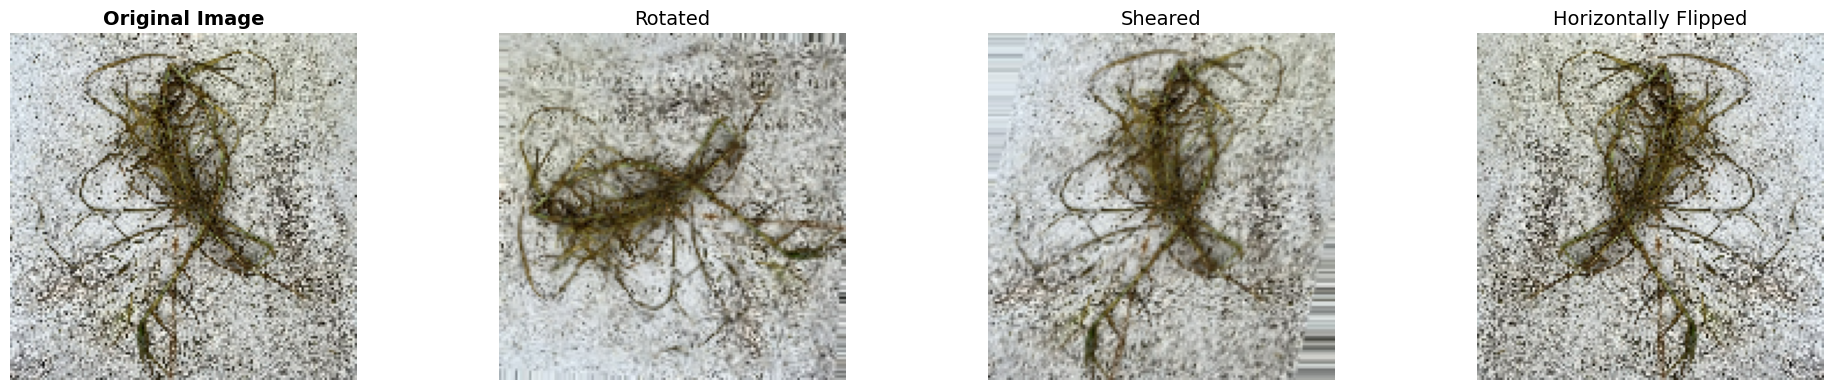

Class of the displayed image: Vegetation


In [12]:
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.preprocessing.image import ImageDataGenerator, load_img, img_to_array

# Ensure df_train is defined and has the required 'Image_Path' column
# Load a specific image from the dataset
image_path = df_train['Image_Path'].iloc[69]  # Make sure 69th index is valid
original_image = load_img(image_path, target_size=image_size)
original_image_array = img_to_array(original_image) / 255.0  # Normalize the image

# Create separate image generators for each augmentation
rotation_gen = ImageDataGenerator(rotation_range=90)
shear_gen = ImageDataGenerator(shear_range=45)

# Generate augmented images
rotated_image = rotation_gen.random_transform(original_image_array)
sheared_image = shear_gen.random_transform(original_image_array)

# Force horizontal flip
flipped_image = np.fliplr(original_image_array)

# Combine augmented images and their labels
augmented_images = [rotated_image, sheared_image, flipped_image]
augmentation_types = ['Rotated', 'Sheared', 'Horizontally Flipped']

# Function to display images
def plot_images(original_image, augmented_images, augmentation_types):
    n = len(augmented_images)
    plt.figure(figsize=(20, 4))
    
    # Display original image
    plt.subplot(1, n+1, 1)
    plt.imshow(original_image)
    plt.title('Original Image', fontsize=14, fontweight='bold')
    plt.axis('off')
    
    # Display augmented images
    for i in range(n):
        plt.subplot(1, n+1, i+2)
        plt.imshow(augmented_images[i])
        plt.title(augmentation_types[i], fontsize=14)
        plt.axis('off')
    
    plt.tight_layout()
    plt.show()

# Plot original and augmented images
plot_images(original_image, augmented_images, augmentation_types)

# Print the class of the selected image (optional)
class_name = df_train['Class'].iloc[69]  # Ensure 'Class' column exists
print(f"Class of the displayed image: {class_name}")


In [22]:
# Clear Session
import tensorflow as tf
seed = 42
tf.keras.backend.clear_session()
np.random.seed(seed)
tf.random.set_seed(seed)

In [23]:
# Create the model
noob_model = Sequential()

# First Conv Block
noob_model.add(Conv2D(32, (3, 3), padding='same', input_shape=(512, 512, 3)))
noob_model.add(BatchNormalization())
noob_model.add(ReLU())
noob_model.add(MaxPooling2D((2, 2)))

# Second Conv Block
noob_model.add(Conv2D(64, (3, 3), padding='same'))
noob_model.add(BatchNormalization())
noob_model.add(ReLU())
noob_model.add(MaxPooling2D((2, 2)))

# Third Conv Block
noob_model.add(Conv2D(128, (3, 3), padding='same'))
noob_model.add(BatchNormalization())
noob_model.add(ReLU())
noob_model.add(MaxPooling2D((2, 2)))

# Global Average Pooling
noob_model.add(GlobalAveragePooling2D())

# Fully connected layers
noob_model.add(Dense(256, activation='relu'))
noob_model.add(Dropout(0.5))

# Output layer
noob_model.add(Dense(9, activation='softmax'))  # 9 classes for waste classification

# Compile the model
noob_model.compile(optimizer=Adam(learning_rate=0.001),
                   loss='categorical_crossentropy',
                   metrics=['accuracy'])

In [24]:
# Now plot the model
tf.keras.utils.plot_model(noob_model, show_shapes=True)

You must install pydot (`pip install pydot`) and install graphviz (see instructions at https://graphviz.gitlab.io/download/) for plot_model to work.


In [25]:
# Display the model summary
noob_model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 299, 299, 32)      896       
                                                                 
 batch_normalization (BatchN  (None, 299, 299, 32)     128       
 ormalization)                                                   
                                                                 
 re_lu (ReLU)                (None, 299, 299, 32)      0         
                                                                 
 max_pooling2d (MaxPooling2D  (None, 149, 149, 32)     0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 149, 149, 64)      18496     
                                                                 
 batch_normalization_1 (Batc  (None, 149, 149, 64)     2

In [26]:
# Define classes
classes = list(train_generator.class_indices.keys())

# Apply class weight to handle imbalance data
class_weights = class_weight.compute_class_weight(class_weight = 'balanced',
                                                  classes = np.unique(train_generator.classes),
                                                  y = train_generator.classes)

train_class_weights = dict(enumerate(class_weights))

for idx, weight in train_class_weights.items():
    class_name = classes[idx]
    print(f"{class_name} : {weight:.2f}")

Cardboard : 1.15
Food Organics : 1.28
Glass : 1.26
Metal : 0.67
Miscellaneous Trash : 1.07
Paper : 1.06
Plastic : 0.57
Textile Trash : 1.67
Vegetation : 1.21


In [27]:
# Create early stopping callback
early_stopping = tf.keras.callbacks.EarlyStopping(
    monitor='val_accuracy',
    patience=15,
    restore_best_weights=True,
    verbose=1
)

In [28]:
# Train the model
history_noob_model = noob_model.fit(
    train_generator,
    epochs=10,
    validation_data=val_generator,
    class_weight=train_class_weights,
    callbacks=[early_stopping],
    verbose=1
)

Epoch 1/10
 32/357 [=>............................] - ETA: 1:18 - loss: 2.2723 - accuracy: 0.1602

KeyboardInterrupt: 